In [1]:
import sys
sys.path.append("/Users/jameskitchens/Documents/GitHub/sparg2.0")

import sparg
import tskit
import msprime
import numpy as np
import tskit_arg_visualizer as viz
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter("always")

In [24]:
ts = tskit.load("two_pops.trees")

np.random.seed(1)
keep_nodes = list(np.random.choice(ts.samples(), 50, replace=False))
ts_sim, maps_sim = ts.simplify(samples=keep_nodes, keep_input_roots=False, keep_unary=True, map_nodes=True)
ts_flagged = sparg.add_recomb_node_flags_to_ts(ts=ts_sim)
ts_filtered, maps_filtered = sparg.remove_uninformative_nodes(ts=ts_flagged, keep_young_nodes={"below": 1000, "step": 10})

In [27]:
unique_paths = sparg.identify_unique_paths(ts=ts_filtered)

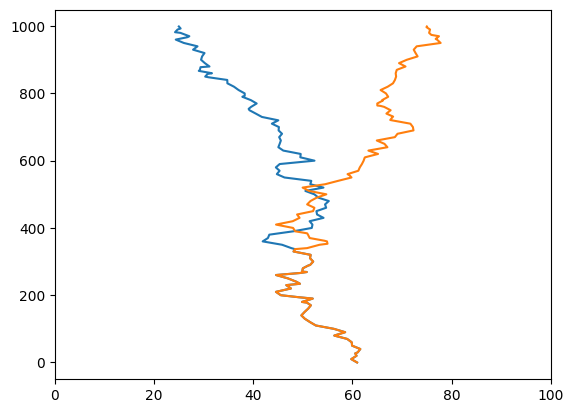

In [35]:
for i,path in enumerate(unique_paths): #3537:3539 #3699
    if i in [3485, 3699]:
        locations = []
        times = []
        for node in path:
            locations.append(ts_filtered.individual(ts_filtered.node(node).individual).location[0])
            times.append(ts_filtered.node(node).time)
        if i == 0:
            plt.plot(locations, times, label="truth")
        else:
            plt.plot(locations, times)
plt.xlim(0,100)
plt.show()

In [36]:
from_nine_nodes = []
from_nine_paths = []
for i,path in enumerate(unique_paths):
    if i in [3485, 3699]:
        from_nine_paths.append(path)
        for node in path:
            if node not in from_nine_nodes:
                from_nine_nodes.append(node)

In [ ]:
dispersal_rate, cov_mat, paths, locations_of_nodes, variances_in_node_locations = sparg.estimate_spatial_parameters(ts=ts_filtered, return_ancestral_node_positions=from_nine_nodes)